# Mapping lead time to get the actual booking date

In [176]:
import pandas as pd
import numpy as np

### loading dataset

In [177]:
df = pd.read_excel('C:/Users/Dhyey2.Patel/Desktop/Dhyey2.Patel/PVC_import_analysis_&_forecasting/data/preprocessed data/PVC-suspension_fin.xlsx')
df.rename(columns={'Foreign Country': 'country'}, inplace=True)

### loading mapping dataset

In [178]:
mapping = pd.read_csv('C:/Users/Dhyey2.Patel/Desktop/Dhyey2.Patel/PVC_import_analysis_&_forecasting/data/raw-data/Country - Lead Time mapping.csv')
mapping.rename(columns={'Lead Time': 'lead_time'}, inplace=True)
mapping.rename(columns={'Country': 'country'}, inplace=True)

#### mapping lead time with country

In [179]:
merged_df = pd.merge(df, mapping, on='country', how='left')
print(merged_df.shape)
print(merged_df.isna().sum())
merged_df.head(5)

(100127, 9)
ds               0
product          0
Grade            0
K Value         13
country          0
y                0
unitp            2
k               13
lead_time    18257
dtype: int64


,ds,product,Grade,K Value,country,y,unitp,k,lead_time
0,2019-04-01,pvcsusp,tk1000,67.0,japan,193.6,960.0,high k,33.0
1,2019-04-01,pvcsusp,tk800,61.0,japan,290.4,960.0,medium k,33.0
2,2019-04-01,pvcsusp,tk1000,67.0,japan,102.0,950.0,high k,33.0
3,2019-04-01,pvcsusp,th1000,67.0,japan,52.5,970.0,high k,33.0
4,2019-04-01,pvcsusp,s1001st,67.0,japan,64.0,960.0,high k,33.0


#### listing nan lead time country

In [180]:
nan = merged_df[merged_df.isnull().any(axis=1)]
nan = nan['country']
nan.unique()

array(['iran', 'uae', 'ukraine', 's arabia', 'russia', 'usa', 'norway',
       's africa', 'sweden', 'hungary', 'uk', 'czech republic', 'china',
       'india', 'colombia', 'mexico', 's korea', 'republic of korea'],
      dtype=object)

#### filling nan country leat time

In [181]:
nan_columns = { 
'country':'lead_time',
'iran': 0,
'uae': 10,
'ukraine': 0,
's arabia': 11,
'russia': 0,
'usa': 36,
'norway': 0,
's africa':23 ,
'sweden': 0,
'hungary': 0,
'uk' : 31,
'czech republic': 0,
'china': 29,
'india': 0,
'colombia': 49,
'mexico': 44,
's korea': 25,
'mexico ': 44,
'indonesia ': 22,
'sweden ': 0,
'colombia ': 49,
'france ':  29,
'belgium ': 29,
'germany ': 28,
'turkey ': 23,
'philippines ': 26,
'spain ': 26,
'norway ': 0,
'russia ': 0,
'egypt ': 21,
'republic of korea': 25
}


# Function to fill NaN based on key_col and dictionary
def fill_nan(row):
    if pd.isna(row['lead_time']):
        return nan_columns.get(row['country'], row['lead_time'])
    else:
        return row['lead_time']

# Apply function row-wise
merged_df['lead_time'] = merged_df.apply(fill_nan, axis=1)

print(merged_df.shape)
print(merged_df.isna().sum())
merged_df.head(5)


(100127, 9)
ds            0
product       0
Grade         0
K Value      13
country       0
y             0
unitp         2
k            13
lead_time     0
dtype: int64


,ds,product,Grade,K Value,country,y,unitp,k,lead_time
0,2019-04-01,pvcsusp,tk1000,67.0,japan,193.6,960.0,high k,33.0
1,2019-04-01,pvcsusp,tk800,61.0,japan,290.4,960.0,medium k,33.0
2,2019-04-01,pvcsusp,tk1000,67.0,japan,102.0,950.0,high k,33.0
3,2019-04-01,pvcsusp,th1000,67.0,japan,52.5,970.0,high k,33.0
4,2019-04-01,pvcsusp,s1001st,67.0,japan,64.0,960.0,high k,33.0


### Calculating booking date by lead time

In [182]:
merged_df['ds'] = pd.to_datetime(merged_df['ds'])
merged_df['booking_date'] = merged_df['ds'] - pd.to_timedelta(merged_df['lead_time'], unit='D')
merged_df = merged_df[['ds', 'booking_date', 'product', 'Grade', 'K Value', 'k', 'country', 'lead_time', 'y', 'unitp']]
merged_df.head(5)

,ds,booking_date,product,Grade,K Value,k,country,lead_time,y,unitp
0,2019-04-01,2019-02-27,pvcsusp,tk1000,67.0,high k,japan,33.0,193.6,960.0
1,2019-04-01,2019-02-27,pvcsusp,tk800,61.0,medium k,japan,33.0,290.4,960.0
2,2019-04-01,2019-02-27,pvcsusp,tk1000,67.0,high k,japan,33.0,102.0,950.0
3,2019-04-01,2019-02-27,pvcsusp,th1000,67.0,high k,japan,33.0,52.5,970.0
4,2019-04-01,2019-02-27,pvcsusp,s1001st,67.0,high k,japan,33.0,64.0,960.0


In [183]:
merged_df.to_excel('C:/Users/Dhyey2.Patel/Desktop/Dhyey2.Patel/PVC_import_analysis_&_forecasting/data/preprocessed data/PVC-suspension_lead_time.xlsx', index=False)

# Correlation Matrix

<Axes: >

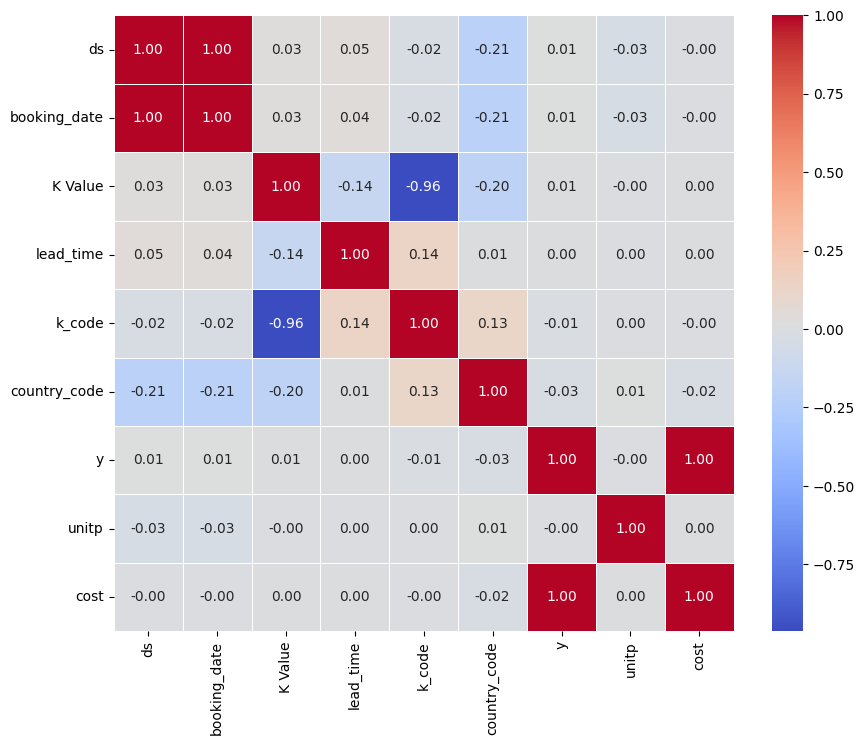

In [184]:
cat_to_num = pd.read_excel('C:/Users/Dhyey2.Patel/Desktop/Dhyey2.Patel/PVC_import_analysis_&_forecasting/data/preprocessed data/cat_to_num_mapping.xlsx')

final_df = merged_df.copy()

k_map =  dict(zip(cat_to_num['k_level'], cat_to_num['k_code']))
final_df['k_code'] = final_df['k'].map(k_map)

cat_to_num['country'] = cat_to_num['country'].str.lower()
country_map =  dict(zip(cat_to_num['country'], cat_to_num['country_code']))
final_df['country_code'] = final_df['country'].map(country_map)

grade_map =  dict(zip(cat_to_num['grade'], cat_to_num['grade_code']))
final_df['grade_code'] = final_df['Grade'].map(grade_map)

final_df['product_code'] = 1

final_df['cost'] = final_df['unitp'] * final_df['y']
corr = final_df[['ds', 'booking_date', 'K Value', 'lead_time', 'k_code', 'country_code', 'y', 'unitp', 'cost']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

In [185]:
dset = pd.read_excel('C:/Users/Dhyey2.Patel/Desktop/Dhyey2.Patel/PVC_import_analysis_&_forecasting/data/preprocessed data/PVC-suspension_lead_time.xlsx')
dset['cost'] = dset['unitp'] * dset['y']

resampled_dataset = (
    dset
    .groupby(pd.Grouper(key='ds', freq='7D', label='left', closed='left'))[['cost', 'unitp']]
    .sum()
    .reset_index()
)
resampled_dataset.head(10)

,ds,cost,unitp
0,2019-04-01,49350870.52,340858.7
1,2019-04-08,38597049.25,278437.5
2,2019-04-15,38027963.84,272073.0
3,2019-04-22,36276167.42,254366.1
4,2019-04-29,36137017.90,270342.3
5,2019-05-06,28245910.28,200655.6
6,2019-05-13,42385831.42,309432.7
7,2019-05-20,28747711.46,233647.9
8,2019-05-27,30198502.56,249039.3
9,2019-06-03,29525331.24,244501.7


In [186]:
resampled_dataset.tail(5)

,ds,cost,unitp
322,2025-06-02,1.386527e+07,88097.577897
323,2025-06-09,9.101193e+06,50681.656081
324,2025-06-16,1.867095e+07,84994.744438
325,2025-06-23,6.567364e+06,36225.701405
326,2025-06-30,5.521600e+05,4061.000000
